## Below are some ideas I had for potential improvements... 

## Use TF-IDF instead of CountVectorizer 
CountVectorizer only counts words, which does crop up when testing the final model.
TF-IDF weights them by importance, which works smoother. THis would help classifications such as "free range eggs" vs "eggs" or "milk" vs "oat milk". 


## Encorporating n - grams (now implimented but didnt work as expected!)

Helps the model understand multi-word grocery items, which is important for categories like Eggs & Dairy vs Bakery.

Unigrams (n=1): single words - milk, bread

Bigrams (n=2): pairs of consecutive words - cheddar cheese, chicken breast

Trigrams (n=3): three-word sequences - extra virgin olive oil


edit - TF-IDF weights words by importance (better than raw counts)

Bigrams included - multi-word items like cheddar cheese are captured

Deeper network with dropout - reduces overfitting


Implimented and this happened - 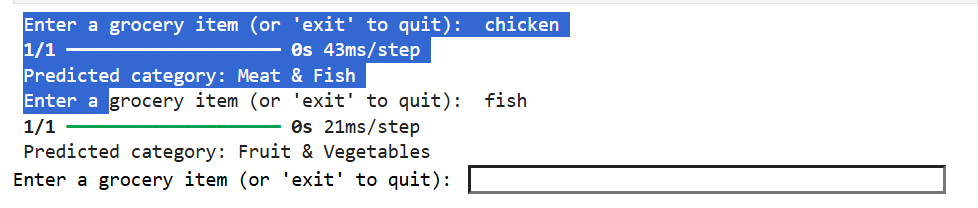

This is happening because the dataset does not contain just "fish" in the training data, so the vectorizer processes it as a vector of all zeros, and then the neural network put it in the most common catagory which turns out to be fruit and veg! 

To improve this, need to use a much larger dataset. The TF-IDF would help this aswell as that would reduce the weight of very common words like 'fish, 'milk', etc... Rare words would gain more weight and in turn this would improve unseen items predictions! 

similarly, tensorflow Hub universal sentence encoder would be best fit! Word embeddings map words to dense vectors in a semantic space. THis means in this scenario fish would be close to salmon or tuna even if that isnt seen in the training data. 

That would be achieved below - 

In [2]:
import tensorflow_hub as hub

#Load pre-trained embedding model
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

#Convert grocery items to embeddings
X_embeddings = embed(df['item_clean'].tolist())
#Then feed X_embeddings into your neural network to allow the model to generate similar words it hasnt 

ModuleNotFoundError: No module named 'tensorflow_hub'

## include predictions for multiple items at once in a table